In [2]:
import requests

In [11]:
url = 'https://en.wikipedia.org/wiki/Rajgad_Fort'

In [15]:
response = requests.get(url=url)
print(response.content)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad Fort - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinn

In [16]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.content, "html.parser")
soup.find('h1', id='firstHeading').text

'Rajgad Fort'

In [17]:
len(soup.find_all('img'))

29

In [18]:
data = response.content.decode('utf-8')

In [19]:
import re

pattern = "<title.*?>.*?</title.*?>"
match_results = re.search(pattern, data, re.IGNORECASE)
title = match_results.group()
title = re.sub("<.*?>", "", title)

print(title)

Rajgad Fort - Wikipedia


In [21]:
text = soup.get_text()
print(text)





Rajgad Fort - Wikipedia




































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file





Languages

Language links are at the top of the page across from the title.



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1History



Toggle History subsection





1.1List of chronological events









2Tourism







3Gallery







4See also







5References







6External links

















Toggle the table of contents







Rajgad Fort



7 languages




Españolहिन्दीमराठीمصرىनेपाल भाषाپنجابیاردو

Edit links











Ar

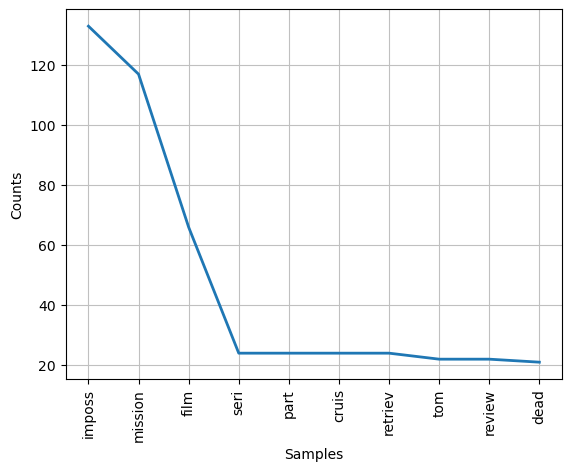

[('imposs', 133), ('mission', 117), ('film', 66)]

In [46]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

url = 'https://en.wikipedia.org/wiki/Mission:_Impossible_(film_series)'
response = requests.get(url=url)

data = response.content.decode('utf-8')

soup = BeautifulSoup(response.content, "html.parser")
# paragraphs = soup.find_all('p')
# text = [para.text for para in paragraphs]
# text = ''.join(text)

text = soup.get_text()

# Tokenize the words
tokens = word_tokenize(text)
tokens = [word for word in tokens if word.isalpha()]

# Removing the stopwords
stopword = stopwords.words("english")
words = [word for word in tokens if word.lower() not in stopword]

# Stemming
porter = PorterStemmer()
tokens = [porter.stem(word) for word in words]

# Frequency Distribution Plot
freq = FreqDist(tokens)
freq.plot(10,cumulative=False)
top_words = freq.most_common(3)
top_words

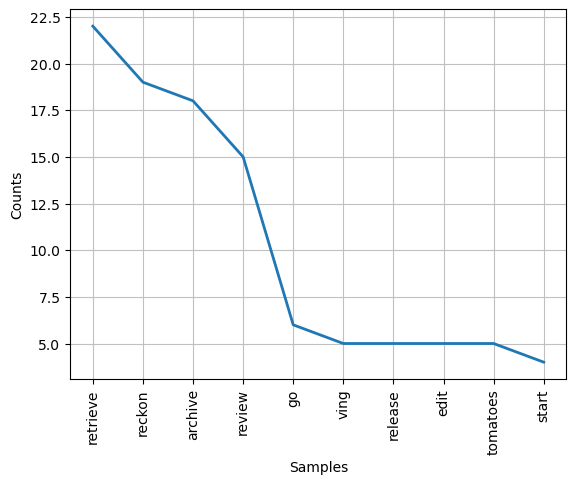

[('retrieve', 22), ('reckon', 19), ('archive', 18)]

In [53]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

wnl = WordNetLemmatizer()

url = 'https://en.wikipedia.org/wiki/Mission:_Impossible_(film_series)'
response = requests.get(url=url)

data = response.content.decode('utf-8')

soup = BeautifulSoup(response.content, "html.parser")
text = soup.get_text()

# Tokenize the words
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Retrieving verbs
tags = pos_tag(tokens)
verb_tags = [tag[0] for tag in pos_tag(tokens) if tag[1].startswith('V')]

# Removing the stopwords
stopword = stopwords.words("english")
words = [wnl.lemmatize(word, 'v') for word in verb_tags if word not in stopword]

# Frequency Distribution Plot
freq = FreqDist(words)
freq.plot(10,cumulative=False)
top_words = freq.most_common(3)
top_words